In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2021-06-30'
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-24,134.639999,132.929993,134.449997,133.410004,68711000.0,133.210419
2021-06-25,133.889999,132.809998,133.460007,133.110001,70783700.0,132.910873
2021-06-28,135.250000,133.350006,133.410004,134.779999,62111300.0,134.578369
2021-06-29,136.490005,134.350006,134.800003,136.330002,64556100.0,136.126053
2021-06-30,137.410004,135.869995,136.169998,136.960007,63261400.0,136.755112


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


In [5]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


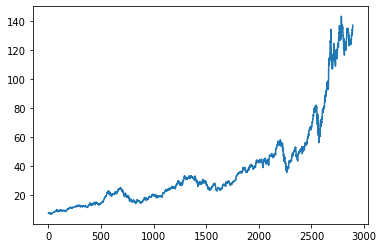

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2889    127.8966
2890    127.8778
2891    127.8862
2892    127.8756
2893    127.8776
Name: Close, Length: 2894, dtype: float64

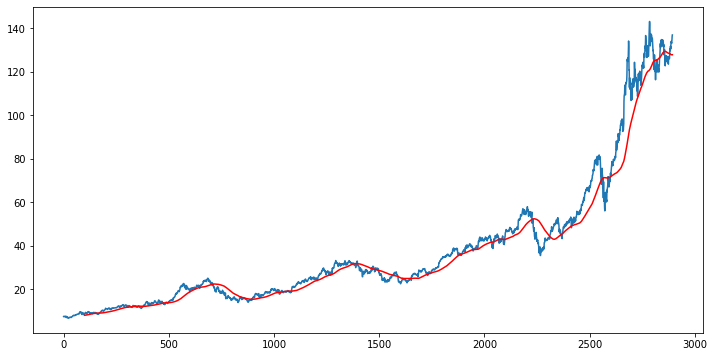

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2889    124.73445
2890    124.81340
2891    124.91985
2892    125.04150
2893    125.14950
Name: Close, Length: 2894, dtype: float64

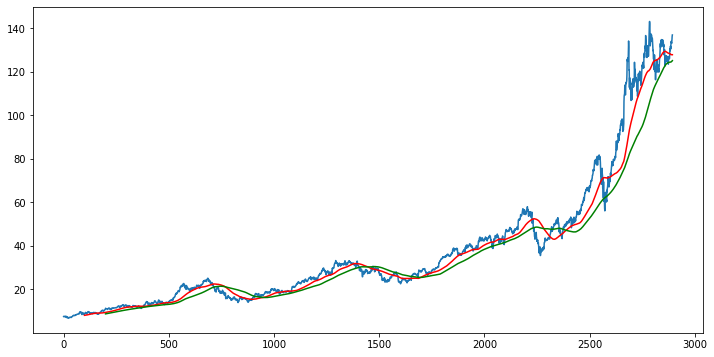

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(2894, 5)

In [12]:
# spliting data into tarining and testing
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2025, 1)
(869, 1)


In [13]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [14]:
data_testing.head()

,Close
2025,44.814999
2026,44.615002
2027,44.250000
2028,44.259998
2029,43.555000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01759523],
       [0.02068477],
       [0.02103329],
       ...,
       [0.98674698],
       [0.98081286],
       [1.        ]])

In [16]:
data_training_array.shape

(2025, 1)

In [17]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [18]:
# Ml model

In [19]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units=50,activation = 'relu',return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 80)           45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 80)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
61/61 [==============================] - 17s 178ms/step - loss: 0.0486
Epoch 2/50
61/61 [==============================] - 11s 185ms/step - loss: 0.0090
Epoch 3/50
61/61 [==============================] - 12s 195ms/step - loss: 0.00781s - loss:
Epoch 4/50
61/61 [==============================] - 12s 205ms/step - loss: 0.0064
Epoch 5/50
61/61 [==============================] - 13s 220ms/step - loss: 0.0060
Epoch 6/50
61/61 [==============================] - 13s 207ms/step - loss: 0.0060
Epoch 7/50
61/61 [==============================] - 11s 187ms/step - loss: 0.0057
Epoch 8/50
61/61 [==============================] - 11s 187ms/step - loss: 0.0050
Epoch 9/50
61/61 [==============================] - 12s 189ms/step - loss: 0.0048
Epoch 10/50
61/61 [==============================] - 11s 186ms/step - loss: 0.0051
Epoch 11/50
61/61 [==============================] - 12s 189ms/step - loss: 0.0051
Epoch 12/50
61/61 [==============================] - 12s 191ms/step - loss: 0.0044
Epo

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
2025,44.814999
2026,44.615002
2027,44.250000
2028,44.259998
2029,43.555000


In [27]:
past_100_days=data_training.tail(100)
final_df = past_100_days.append(data_testing,ignore_index = True)
final_df.head()

,Close
0,39.817501
1,39.965000
2,40.367500
3,40.727501
4,40.837502


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03967941],
       [0.04105006],
       [0.04479033],
       [0.04813567],
       [0.04915787],
       [0.0506679 ],
       [0.05078406],
       [0.04620745],
       [0.04581252],
       [0.04430245],
       [0.03819259],
       [0.04486002],
       [0.04337321],
       [0.04056218],
       [0.03737948],
       [0.04109653],
       [0.0382855 ],
       [0.03842489],
       [0.03224534],
       [0.02601927],
       [0.02253455],
       [0.01942154],
       [0.02543849],
       [0.02797071],
       [0.02576373],
       [0.02771516],
       [0.02699499],
       [0.0285515 ],
       [0.02622835],
       [0.03066557],
       [0.0304565 ],
       [0.03171099],
       [0.03185037],
       [0.03336044],
       [0.0320827 ],
       [0.03438263],
       [0.04109653],
       [0.04246718],
       [0.04081773],
       [0.03203622],
       [0.03266349],
       [0.03247763],
       [0.03463818],
       [0.0330352 ],
       [0.03535835],
       [0.04846091],
       [0.05698687],
       [0.062

In [29]:
input_data.shape

(969, 1)

In [30]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(869, 100, 1)
(869,)


In [31]:
#making prediction
y_predicted = model.predict(x_test)
y_predicted.shape

(869, 1)

In [32]:
y_test

array([0.08611916, 0.08426066, 0.08086885, 0.08096176, 0.0744105 ,
       0.0671855 , 0.06811474, 0.05986759, 0.05756766, 0.05863629,
       0.0594494 , 0.04253687, 0.03322105, 0.04841444, 0.04030663,
       0.03010801, 0.0330352 , 0.04767105, 0.05145776, 0.0584969 ,
       0.07155303, 0.07025204, 0.06890464, 0.06709259, 0.07041467,
       0.07738413, 0.08544546, 0.08409803, 0.08347077, 0.07622255,
       0.07903358, 0.0804507 , 0.08010221, 0.07629224, 0.08072947,
       0.08779183, 0.09183412, 0.08776861, 0.08421419, 0.08470203,
       0.08323847, 0.0769195 , 0.07678012, 0.06755721, 0.06193519,
       0.05285167, 0.07104194, 0.06075036, 0.0564293 , 0.0594494 ,
       0.05689392, 0.06086653, 0.06834707, 0.07111163, 0.06084331,
       0.06472296, 0.07215704, 0.07027529, 0.07422464, 0.07559529,
       0.07812755, 0.08374957, 0.08282029, 0.07111163, 0.05466372,
       0.05354862, 0.04820537, 0.04985478, 0.05117899, 0.04676502,
       0.05359505, 0.06251598, 0.07986991, 0.0806133 , 0.09673

In [33]:
y_predicted

array([[0.14641288],
       [0.14676672],
       [0.14719506],
       [0.14767689],
       [0.14818333],
       [0.14867581],
       [0.14910002],
       [0.14940986],
       [0.14956576],
       [0.14953494],
       [0.14930964],
       [0.14890707],
       [0.14832953],
       [0.14755642],
       [0.14660501],
       [0.14551611],
       [0.14428598],
       [0.14292504],
       [0.1415056 ],
       [0.14012429],
       [0.13887207],
       [0.13784274],
       [0.13710974],
       [0.13669515],
       [0.13658133],
       [0.13671206],
       [0.13704509],
       [0.13756855],
       [0.13827688],
       [0.13914585],
       [0.1401289 ],
       [0.14116779],
       [0.1422189 ],
       [0.1432474 ],
       [0.14421904],
       [0.14511116],
       [0.14593232],
       [0.14671278],
       [0.14746776],
       [0.14819841],
       [0.14889759],
       [0.14955477],
       [0.15014812],
       [0.15065204],
       [0.15103564],
       [0.15124711],
       [0.15123793],
       [0.151

In [34]:
scaler.scale_

array([0.0092926])

In [35]:
scale_factor = 1/0.0092926
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

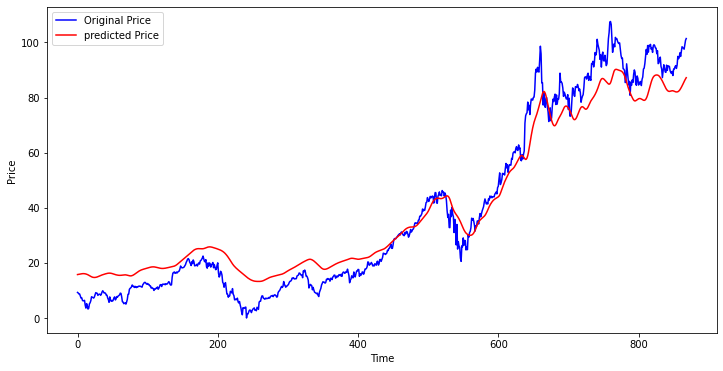

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()